In this notebook we will compare the MBR scores calculated with the monte-carlo estimates and those from the predictive model
We will try to analyse failure points and think about how to tackle those.



In [1]:
# Some setup code for imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from custom_datasets.BayesRiskDatasetLoader import BayesRiskDatasetLoader


In [2]:

# First we will load the test set with the calculated scores.
dataset_loader = BayesRiskDatasetLoader("validation_predictive", n_hypotheses=10, n_references=100, sampling_method='ancestral')
dataset = dataset_loader.load(type="pandas")

In [3]:
# We will visualize the scores as



In [4]:
import numpy as np
def calculate_mbr_scores(entry, n_references=1000):
    scores = []
    count = np.sum(entry["utilities_count"])
    for hyp, util in zip(entry["hypotheses"], entry["utilities"]):
        score = np.sum(util* entry["utilities_count"])/count
        scores.append(score)
    return scores

In [5]:
entry_id=5
entry = dataset.data.iloc[entry_id]
scores = calculate_mbr_scores(entry)

print(scores)

[1.451531677544117, 1.2478587037324906, 1.4439876160025598, 1.3115386925637722]


In [6]:
### Next up we will read the trained model and calculate the score given by the heads
from models.pl_predictive.PLPredictiveModelFactory import PLPredictiveModelFactory
path = "C:/Users/gerso/FBR/predictive/tatoeba-de-en/models/gaussian_mixture/47/"
model, factory = PLPredictiveModelFactory.load(path)

C:\Users\gerso\FBR\NMT/tatoeba-de-en/model
0.0
using a mixture model


In [7]:
from models.MBR_model.GaussianMixtureMBRModel import GaussianMixtureMBRModel
wrapped_model = GaussianMixtureMBRModel(model)

In [8]:
from tqdm import tqdm
all_scores = []
for i, row in tqdm(dataset.data.iterrows(), total=dataset.data.shape[0]):
    source = row["source"]
    hypotheses = list(row["hypotheses"])
    print(len(hypotheses))
    scores = wrapped_model.get_scores([source]* len(hypotheses), hypotheses).tolist()
    all_scores.append(scores)
    
    if i > 200:
        break


  0%|                                                                                                                                                                                                              | 0/2500 [00:00<?, ?it/s]

4


C:\Users\gerso\projects\master-thesis\models\MBR_model\GaussianMixtureMBRModel.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  result = {k: torch.tensor(v) for k, v in result.items()}
  0%|▌                                                                                                                                                                                                     | 7/2500 [00:04<18:50,  2.21it/s]

torch.Size([4, 1000])
4
torch.Size([4, 1000])
3
torch.Size([3, 1000])
3
torch.Size([3, 1000])
10
torch.Size([10, 1000])
4
torch.Size([4, 1000])
6
torch.Size([6, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
4
torch.Size([4, 1000])


  1%|█▎                                                                                                                                                                                                   | 17/2500 [00:04<05:50,  7.07it/s]

7
torch.Size([7, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
3
torch.Size([3, 1000])
2
torch.Size([2, 1000])
9
torch.Size([9, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])


  1%|██▏                                                                                                                                                                                                  | 28/2500 [00:04<02:43, 15.08it/s]

1
torch.Size([1, 1000])
1
torch.Size([1, 1000])
2
torch.Size([2, 1000])
9
torch.Size([9, 1000])
4
torch.Size([4, 1000])
3
torch.Size([3, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])


  1%|██▋                                                                                                                                                                                                  | 34/2500 [00:04<02:01, 20.23it/s]

2
torch.Size([2, 1000])
3
torch.Size([3, 1000])
10
torch.Size([10, 1000])
6
torch.Size([6, 1000])
1
torch.Size([1, 1000])
2
torch.Size([2, 1000])
8
torch.Size([8, 1000])
10
torch.Size([10, 1000])
7
torch.Size([7, 1000])
5
torch.Size([5, 1000])
2


  2%|███▌                                                                                                                                                                                                 | 45/2500 [00:05<01:23, 29.49it/s]

torch.Size([2, 1000])
4
torch.Size([4, 1000])
10
torch.Size([10, 1000])
7
torch.Size([7, 1000])
8
torch.Size([8, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
1
torch.Size([1, 1000])
2
torch.Size([2, 1000])

  2%|████▍                                                                                                                                                                                                | 56/2500 [00:05<01:05, 37.33it/s]


3
torch.Size([3, 1000])
2
torch.Size([2, 1000])
8
torch.Size([8, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
9
torch.Size([9, 1000])
4
torch.Size([4, 1000])
8
torch.Size([8, 1000])
2
torch.Size([2, 1000])


  3%|█████▏                                                                                                                                                                                               | 66/2500 [00:05<00:57, 42.31it/s]

10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
5
torch.Size([5, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
1
torch.Size([1, 1000])
3
torch.Size([3, 1000])


  3%|█████▋                                                                                                                                                                                               | 72/2500 [00:05<00:53, 45.14it/s]

1
torch.Size([1, 1000])
4
torch.Size([4, 1000])
10
torch.Size([10, 1000])
6
torch.Size([6, 1000])
9
torch.Size([9, 1000])
1
torch.Size([1, 1000])
9
torch.Size([9, 1000])
9
torch.Size([9, 1000])
10
torch.Size([10, 1000])
1
torch.Size([1, 1000])


  3%|██████▌                                                                                                                                                                                              | 83/2500 [00:05<00:51, 46.95it/s]

3
torch.Size([3, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
8
torch.Size([8, 1000])
10
torch.Size([10, 1000])
3
torch.Size([3, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])


  4%|███████▍                                                                                                                                                                                             | 95/2500 [00:06<00:48, 49.83it/s]

10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
9
torch.Size([9, 1000])
1
torch.Size([1, 1000])
10
torch.Size([10, 1000])
4
torch.Size([4, 1000])
9
torch.Size([9, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
1
torch.Size([1, 1000])
6


  4%|████████▍                                                                                                                                                                                           | 107/2500 [00:06<00:46, 51.19it/s]

torch.Size([6, 1000])
1
torch.Size([1, 1000])
4
torch.Size([4, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
1
torch.Size([1, 1000])
2
torch.Size([2, 1000])
5
torch.Size([5, 1000])
1
torch.Size([1, 1000])
10
torch.Size([10, 1000])
3
torch.Size([3, 1000])
1
torch.Size([1, 1000])


  5%|████████▊                                                                                                                                                                                           | 113/2500 [00:06<00:46, 51.08it/s]

3
torch.Size([3, 1000])
5
torch.Size([5, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
1
torch.Size([1, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
8
torch.Size([8, 1000])
1
torch.Size([1, 1000])
8
torch.Size([8, 1000])


  5%|█████████▊                                                                                                                                                                                          | 125/2500 [00:06<00:47, 49.87it/s]

8
torch.Size([8, 1000])
2
torch.Size([2, 1000])
4
torch.Size([4, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
7
torch.Size([7, 1000])
6
torch.Size([6, 1000])
6
torch.Size([6, 1000])


  5%|██████████▎                                                                                                                                                                                         | 131/2500 [00:06<00:47, 49.67it/s]

10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
3
torch.Size([3, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
8
torch.Size([8, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])


  6%|███████████                                                                                                                                                                                         | 141/2500 [00:06<00:48, 48.84it/s]

9
torch.Size([9, 1000])
3
torch.Size([3, 1000])
5
torch.Size([5, 1000])
1
torch.Size([1, 1000])
5
torch.Size([5, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
4
torch.Size([4, 1000])
3
torch.Size([3, 1000])
5
torch.Size([5, 1000])
4


  6%|███████████▉                                                                                                                                                                                        | 153/2500 [00:07<00:47, 49.44it/s]

torch.Size([4, 1000])
3
torch.Size([3, 1000])
7
torch.Size([7, 1000])
5
torch.Size([5, 1000])
7
torch.Size([7, 1000])
9
torch.Size([9, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
8
torch.Size([8, 1000])
10
torch.Size([10, 1000])


  7%|████████████▊                                                                                                                                                                                       | 164/2500 [00:07<00:45, 51.01it/s]

10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
9
torch.Size([9, 1000])
4
torch.Size([4, 1000])
9
torch.Size([9, 1000])
5
torch.Size([5, 1000])
3
torch.Size([3, 1000])
1
torch.Size([1, 1000])
8
torch.Size([8, 1000])
10
torch.Size([10, 1000])


  7%|█████████████▎                                                                                                                                                                                      | 170/2500 [00:07<00:44, 51.78it/s]

2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
8
torch.Size([8, 1000])
2
torch.Size([2, 1000])
1
torch.Size([1, 1000])
3
torch.Size([3, 1000])
2
torch.Size([2, 1000])
3
torch.Size([3, 1000])
4
torch.Size([4, 1000])
1
torch.Size([1, 1000])


  7%|██████████████▎                                                                                                                                                                                     | 182/2500 [00:07<00:43, 53.44it/s]

1
torch.Size([1, 1000])
4
torch.Size([4, 1000])
4
torch.Size([4, 1000])
1
torch.Size([1, 1000])
2
torch.Size([2, 1000])
2
torch.Size([2, 1000])
9
torch.Size([9, 1000])
3
torch.Size([3, 1000])
7
torch.Size([7, 1000])
5
torch.Size([5, 1000])


  8%|███████████████▏                                                                                                                                                                                    | 194/2500 [00:07<00:43, 52.74it/s]

4
torch.Size([4, 1000])
7
torch.Size([7, 1000])
6
torch.Size([6, 1000])
8
torch.Size([8, 1000])
8
torch.Size([8, 1000])
5
torch.Size([5, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
1
torch.Size([1, 1000])
4
torch.Size([4, 1000])
8


  8%|███████████████▊                                                                                                                                                                                    | 201/2500 [00:08<01:33, 24.67it/s]

torch.Size([8, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
10
torch.Size([10, 1000])
10
torch.Size([10, 1000])
2
torch.Size([2, 1000])


In [9]:
print(len(all_scores[10]))

7


In [10]:
import matplotlib.pyplot as plt
def clean(s):
    return s.replace('?', '')

def compare_scores(source, target, hypotheses, monte_carlo_scores, predicted_scores, max_show=15, labels=("Monte Carlo", "predicted"), colors=("b", "r"), save=False):
    
    # First we sort based on scores 1
    #First we show the 
    cleaned_source = clean(source)
    cleaned_target = clean(target)
    
    sorted_indices = np.argsort(-monte_carlo_scores)
    
    monte_carlo_1_sorted = monte_carlo_scores[sorted_indices][:max_show]
    predicted_scores_1_sorted = predicted_scores[sorted_indices][:max_show]
    hypotheses_sorted = hypotheses[sorted_indices][:max_show]


    plt.rcdefaults()
    fig, ax = plt.subplots()
        
    
    y_pos = np.arange(len(hypotheses_sorted))
    
    width=0.35

    ax.barh(y_pos - width/2, monte_carlo_1_sorted, width, align='center', color=colors[0], label=labels[0])
    ax.barh(y_pos + width/2, predicted_scores_1_sorted, width, align='center', color=colors[1], label=labels[1])
    
    ax.set_yticks(y_pos, labels=hypotheses_sorted)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('scores')
    ax.set_title('MBR scores sorted on Monte-Carlo: \n {} \n {}'.format(source, target))
    ax.legend()
    
    fig.tight_layout()
    
    if save:
        plt.savefig('{}_{}_{}.png'.format(cleaned_source, cleaned_target, "monte_carlo"), bbox_inches="tight")
    
    plt.show()
   
    
    sorted_indices = np.argsort(-predicted_scores)
    
    monte_carlo_1_sorted = monte_carlo_scores[sorted_indices][:max_show]
    predicted_scores_1_sorted = predicted_scores[sorted_indices][:max_show]
    hypotheses_sorted = hypotheses[sorted_indices][:max_show]
    
    
    plt.rcdefaults()
    fig, ax = plt.subplots()
        
    
    y_pos = np.arange(len(hypotheses_sorted))
    
    width=0.35

    ax.barh(y_pos - width/2, monte_carlo_1_sorted, width, align='center', color=colors[0], label=labels[0])
    ax.barh(y_pos + width/2, predicted_scores_1_sorted, width, align='center', color=colors[1], label=labels[1])
    
    ax.set_yticks(y_pos, labels=hypotheses_sorted)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('scores')
    ax.set_title('MBR scores sorted on predicted: \n {} \n {}'.format(source, target))
    ax.legend()
    fig.tight_layout()
    if save:
        plt.savefig('{}_{}_{}.png'.format(cleaned_source, cleaned_target, "predictive"))
    plt.show()

In [11]:
def compare_random_scores(data, predictive_scores, n_examples=5, seed=1):
    np.random.seed(seed)
    indices = np.random.choice(len(all_scores), size=n_examples)
    
    for i in indices:
        entry = data.iloc[i]
        compare_scores(entry["source"], entry["target"], np.array(entry["hypotheses"]),   np.array(calculate_mbr_scores(entry)), np.array(all_scores[i]), labels=["Monte carlo", 'predicted'], save=True)
    
    

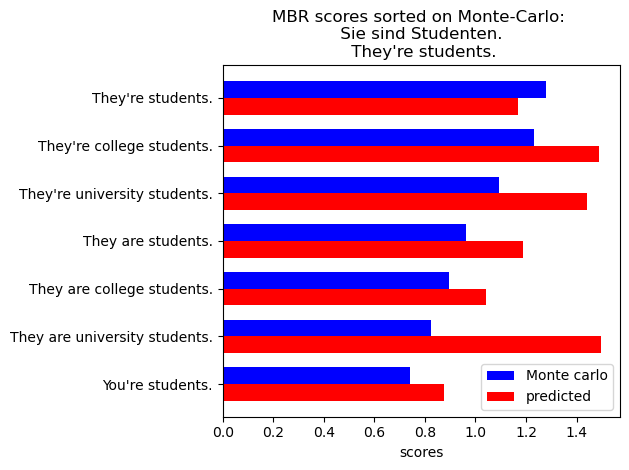

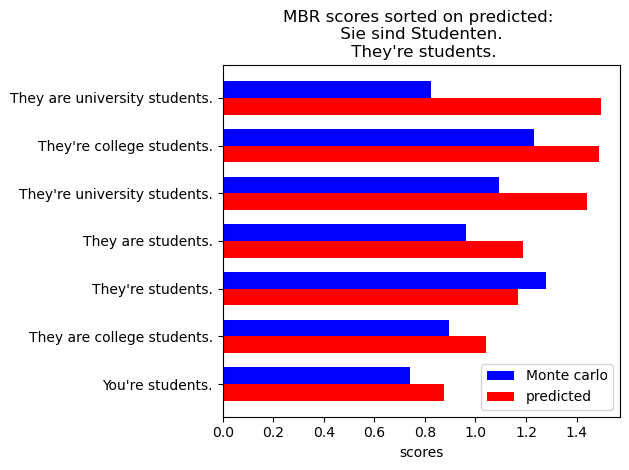

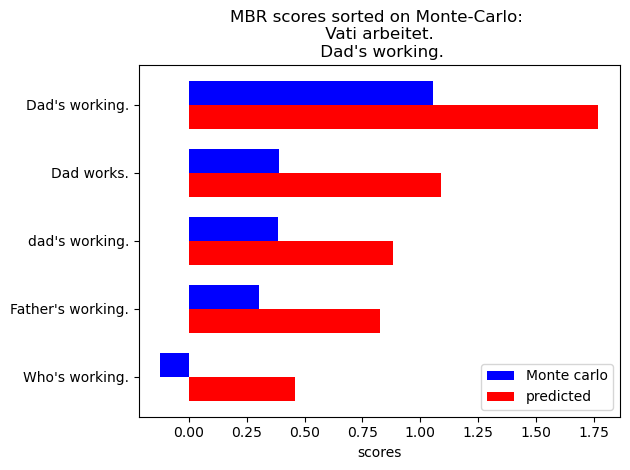

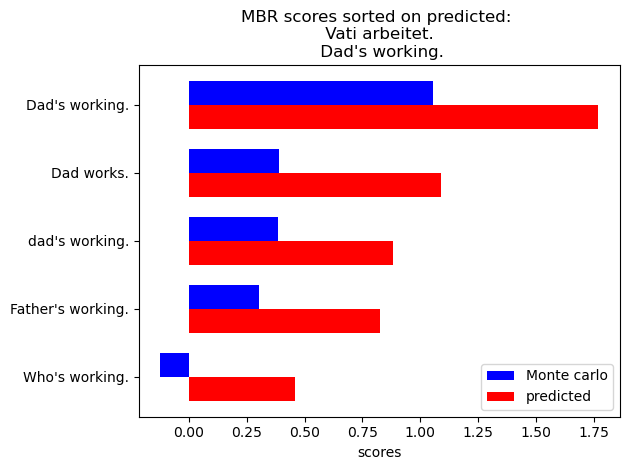

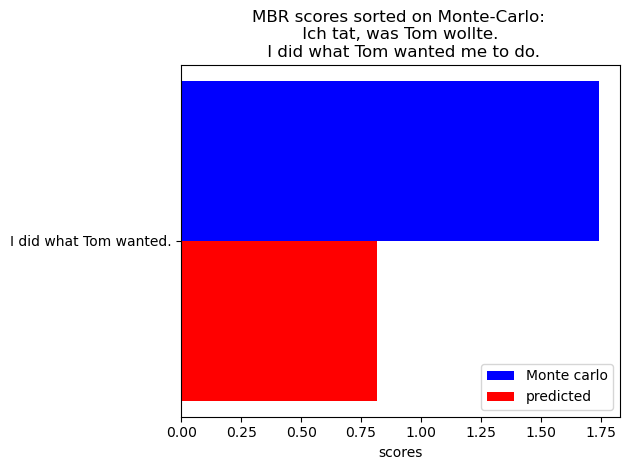

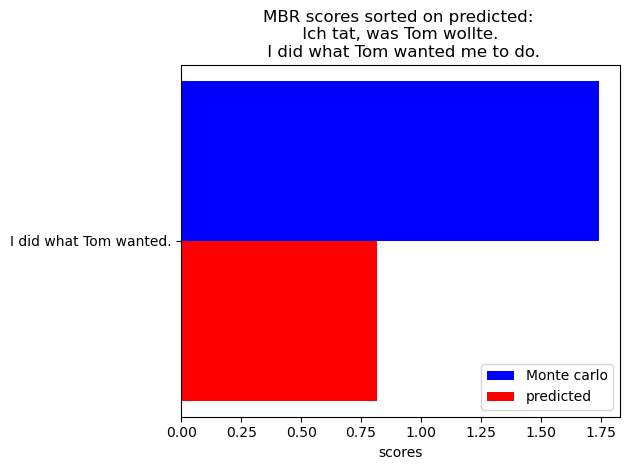

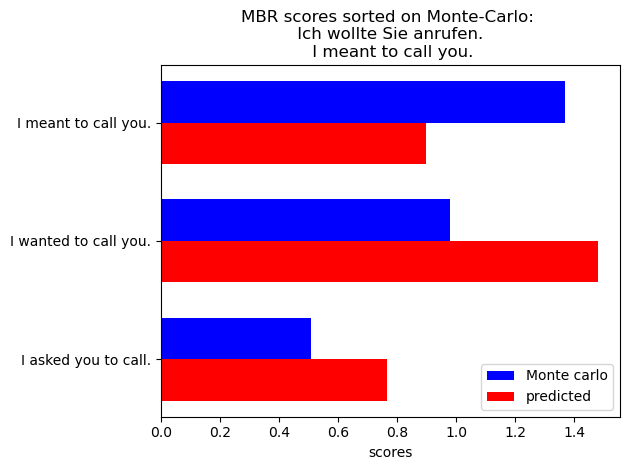

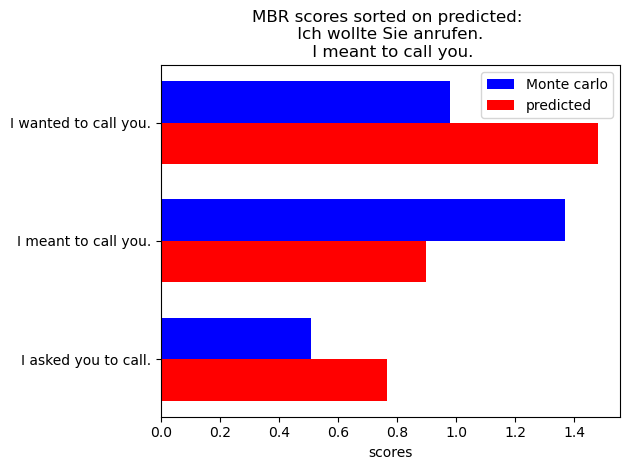

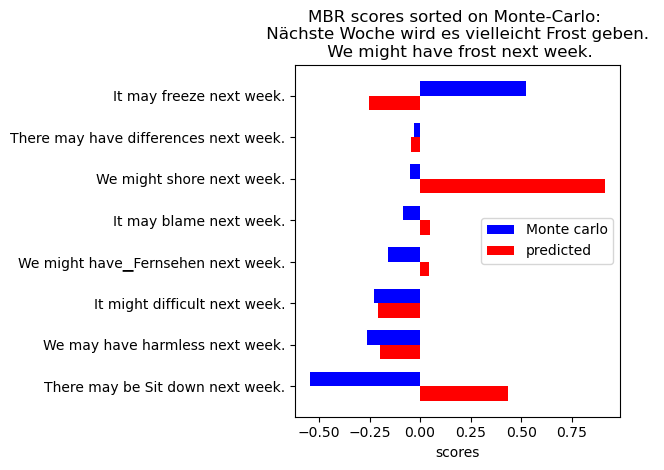

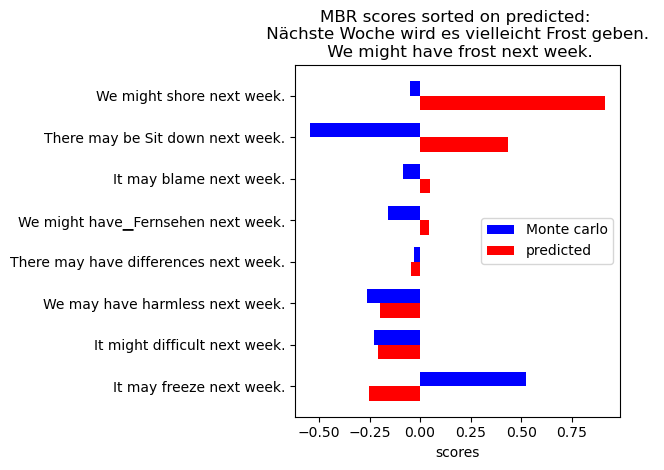

In [12]:
compare_random_scores(dataset.data, all_scores)

In [13]:
reference_scores = []
for i, row in dataset.data.iterrows():
    reference_scores.append(np.array(calculate_mbr_scores(row)))


In [14]:
## Next up we check if we are optimistic or pessimistic.

def calc_opt_statistics(predicted_scores, reference_scores):
    opt_count = 0
    pes_count = 0
    opt_sum = 0
    pes_sum = 0
    for pred_score, ref_score in zip(predicted_scores, reference_scores):
        larger = pred_score >= ref_score
        smaller = ref_score > pred_score
        opt_count += sum(larger)
        pes_count += sum(smaller)
        opt_sum += sum((pred_score - ref_score) * larger)
        pes_sum += sum((ref_score - pred_score) * smaller)
    total = opt_count + pes_count
    opt_percentage = opt_count/total
    pes_percentage = pes_count/total
    opt_avg = opt_sum/opt_count
    pes_avg = pes_sum/pes_count
        
    return {"opt_count": opt_count, "pes_count": pes_count, 
            "opt_sum": opt_sum, "pes_sum": pes_sum,
            "opt_percentage": opt_percentage,
            "pes_percentage": pes_percentage,
            "opt_avg": opt_avg,
            "pes_avg": pes_avg,
           }


In [15]:
statistics = calc_opt_statistics(all_scores, reference_scores)

In [16]:
statistics

{'opt_count': 650,
 'pes_count': 502,
 'opt_sum': 274.41790519069434,
 'pes_sum': 189.94314540967346,
 'opt_percentage': 0.5642361111111112,
 'pes_percentage': 0.4357638888888889,
 'opt_avg': 0.42218139260106824,
 'pes_avg': 0.37837279962086345}

In [17]:
### Here we get the predicted loc and scale for each sentence:
from tqdm import tqdm
all_model_out = []
for i, row in tqdm(dataset.data.iterrows(), total=dataset.data.shape[0]):
    source = row["source"]
    hypotheses = list(row["hypotheses"])

    model_out = wrapped_model.get_model_out([source]* len(hypotheses), hypotheses)
    all_model_out.append(model_out)
    if i > 200:
        break


  8%|███████████████▊                                                                                                                                                                                    | 201/2500 [00:03<00:36, 63.68it/s]


In [18]:
def get_repeated_utils(utilities, count):
    
    repeated_utils = []
    for util in utilities:
        
        r = []
        for u, c in zip(util, count):
            r += [u] * c
        repeated_utils.append(r)
    return repeated_utils
    
    

In [19]:
# def Gauss(x, A, B):
#     y = A*np.exp(-1*B*x**2)
#     return y
import torch.distributions as td
import torch
def show_gaussian_mix(loc, scale, data, source, target, hypothesis, save=False, path='./imgs/'):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    
    cleaned_source = clean(source)
    cleaned_target = clean(target)
    cleaned_hypothesis = clean(hypothesis)
    
    # First plot the histogram
    ax.hist(data, 250, density=True, facecolor='g', alpha=0.75, label="scores")
    
    # Next up we plot the gaussian we tried to fit

    dists = []
    for l, s in zip(loc, scale):
        
        dist = td.Normal(l, s)
    
    
        x = torch.Tensor(np.linspace(l - 2* s, l + 2 * s, 100))
        probs = np.exp(dist.log_prob(x))
        ax.plot(x, probs, label="Predicted fit: \nLoc: {}, Scale: {}".format(str(round(l, 2)), str(round(s, 2))))
    
      
    middle_point = int(len(probs)/2)
    avg = np.mean(data)
    ax.scatter(avg, probs[middle_point], label="avg: {}".format(str(round(avg, 2))), marker="o")
    
   
    
    ax.set_xlabel('scores')
    ax.set_title('MBR scores histogram with Gaussian: \n {} \n {}'.format(source, hypothesis))
    ax.legend()
    fig.tight_layout()
    if save:
        plt.savefig('{}fitted_gaussian_{}_{}.png'.format(path, cleaned_source, cleaned_hypothesis))
    
    plt.show()



tensor([0.3986, 0.6014])


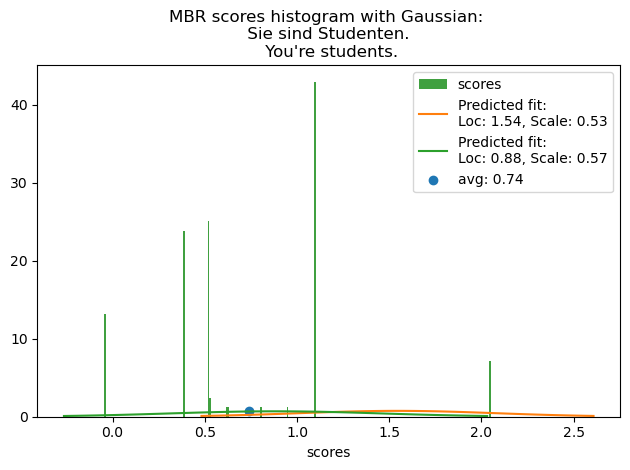

tensor([0.3986, 0.6014])


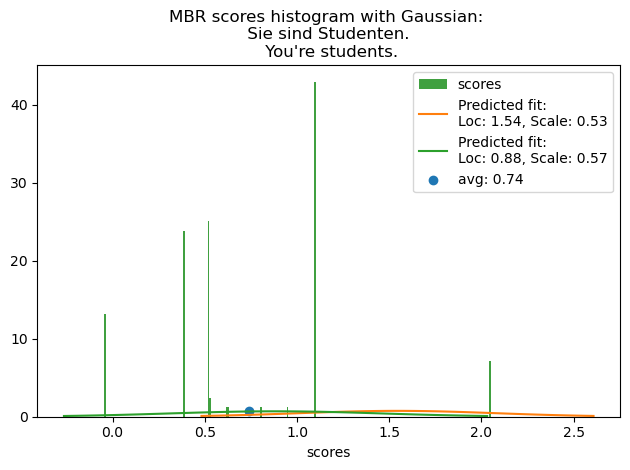

tensor([0.4143, 0.5857])


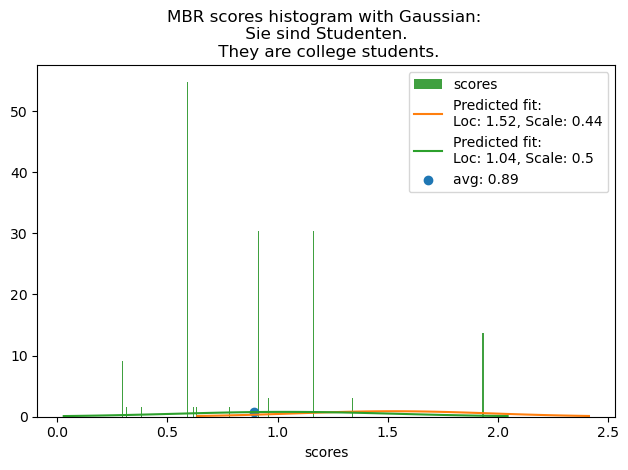

tensor([0.4215, 0.5785])


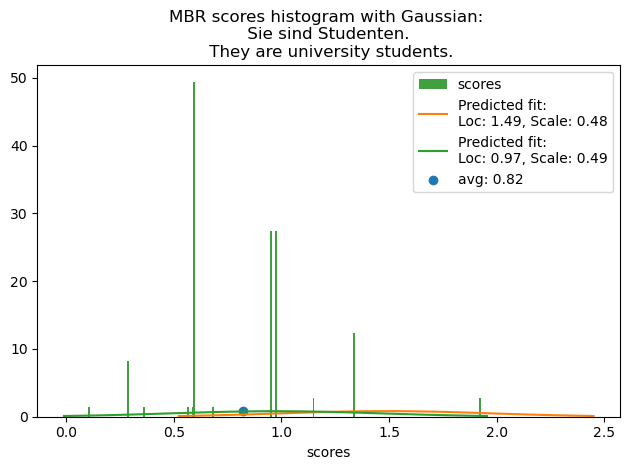

tensor([0.4188, 0.5812])


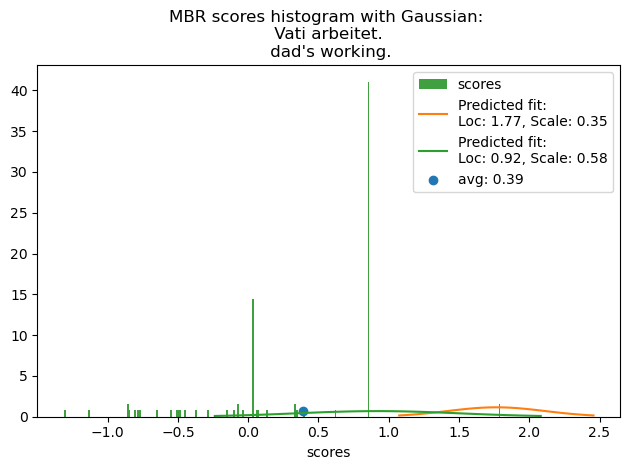

tensor([0.4041, 0.5959])


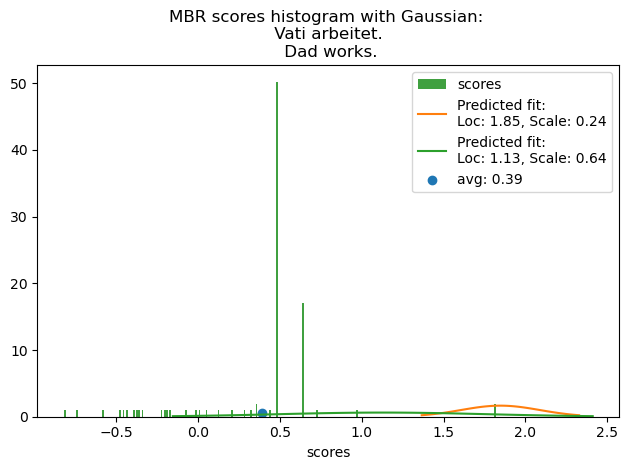

tensor([0.4829, 0.5171])


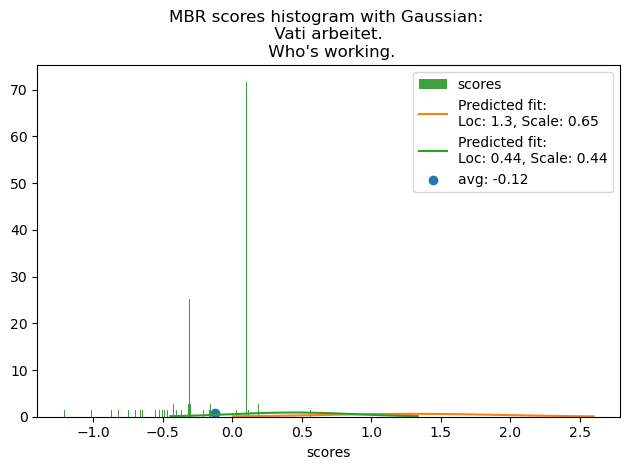

tensor([0.4188, 0.5812])


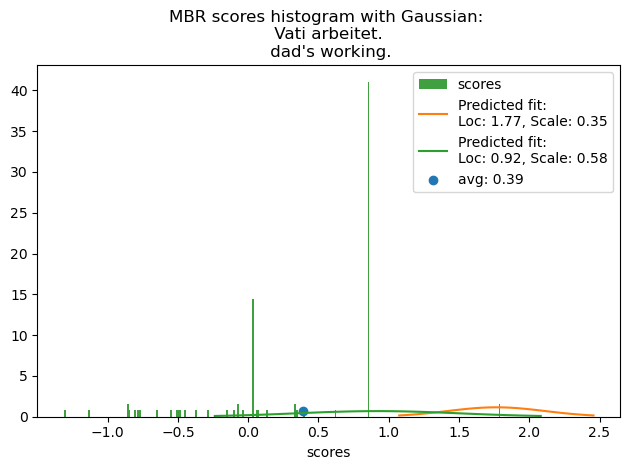

tensor([0.5232, 0.4768])


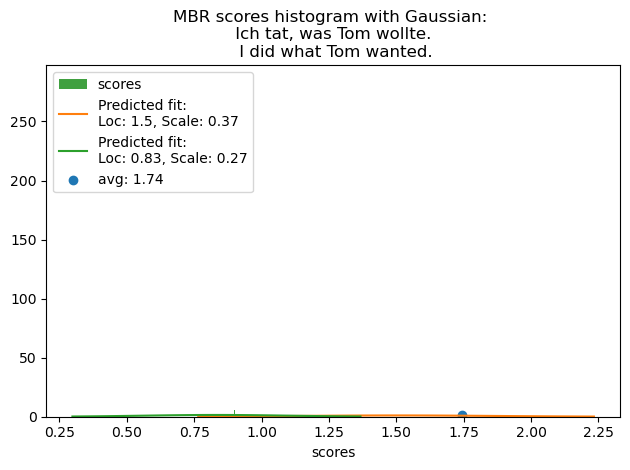

tensor([0.5232, 0.4768])


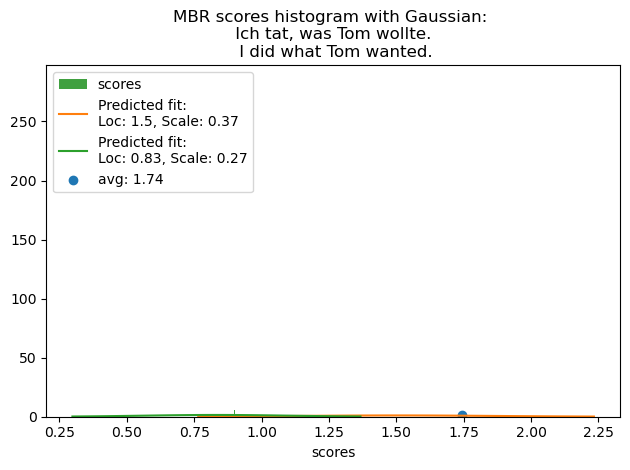

tensor([0.5232, 0.4768])


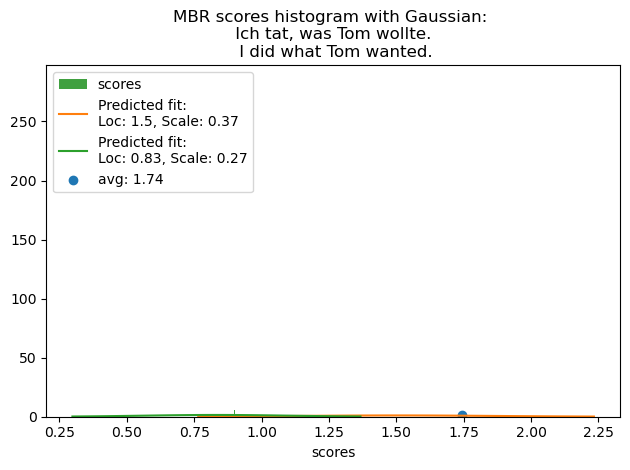

tensor([0.5232, 0.4768])


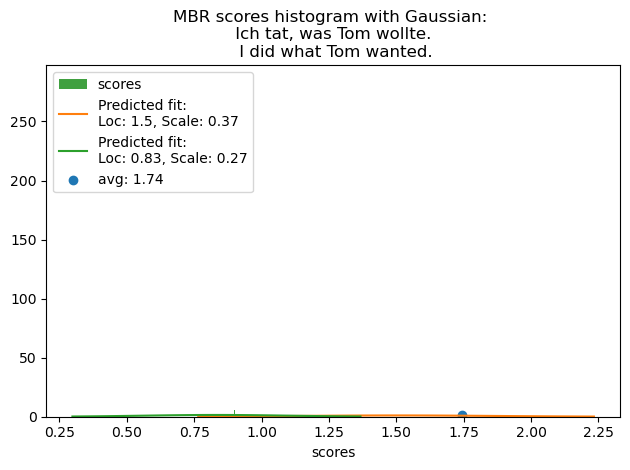

tensor([0.4471, 0.5529])


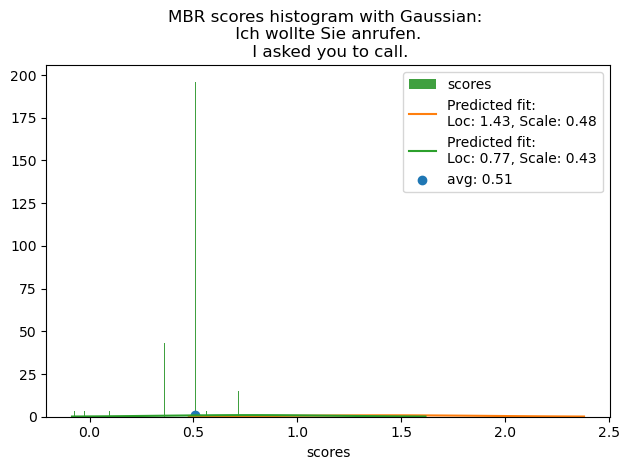

tensor([0.4850, 0.5150])


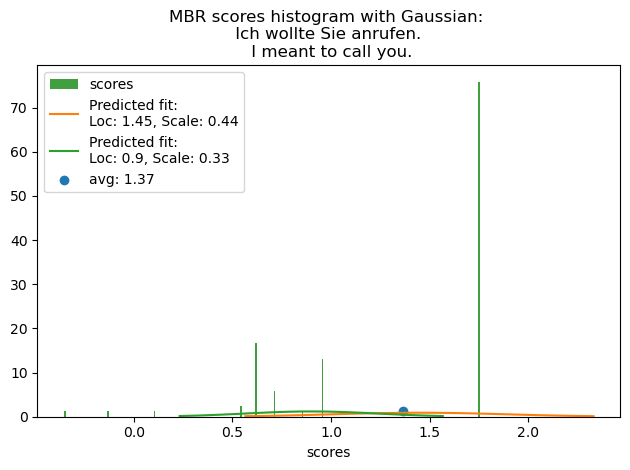

tensor([0.4471, 0.5529])


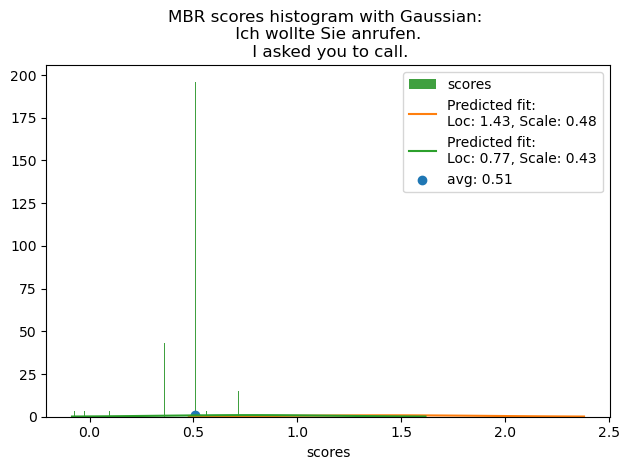

tensor([0.4506, 0.5494])


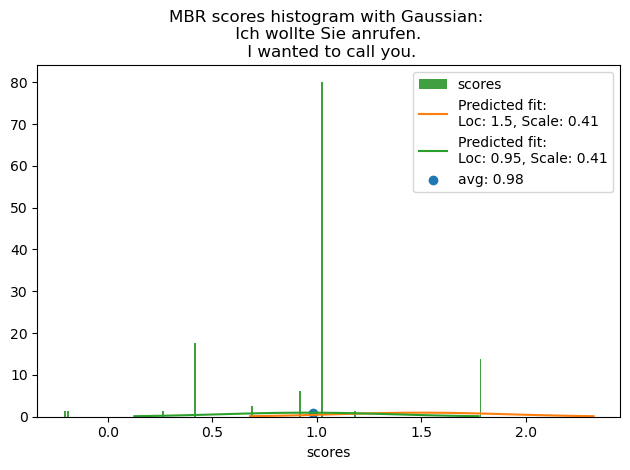

tensor([0.4434, 0.5566])


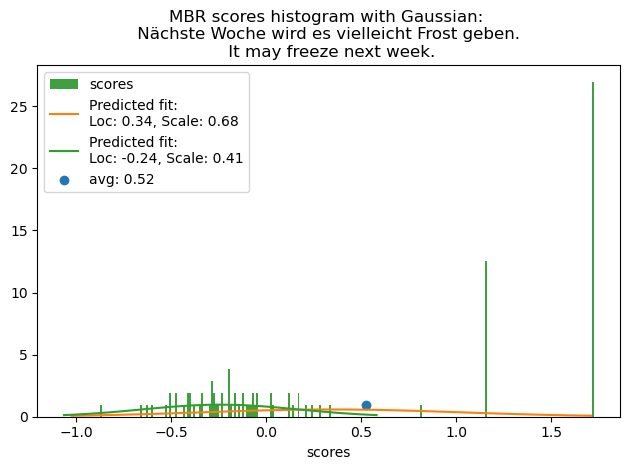

tensor([0.4968, 0.5032])


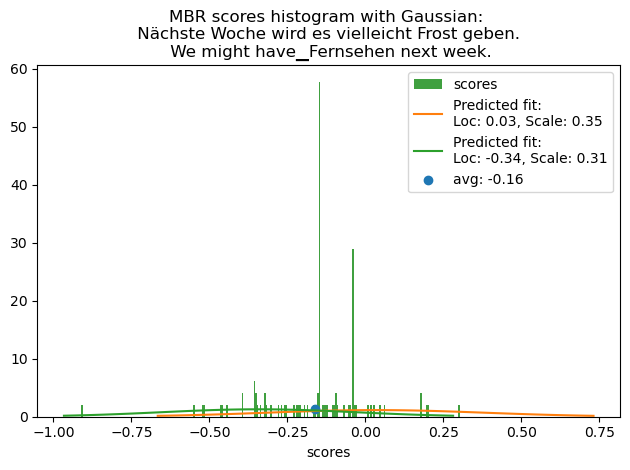

tensor([0.4614, 0.5386])


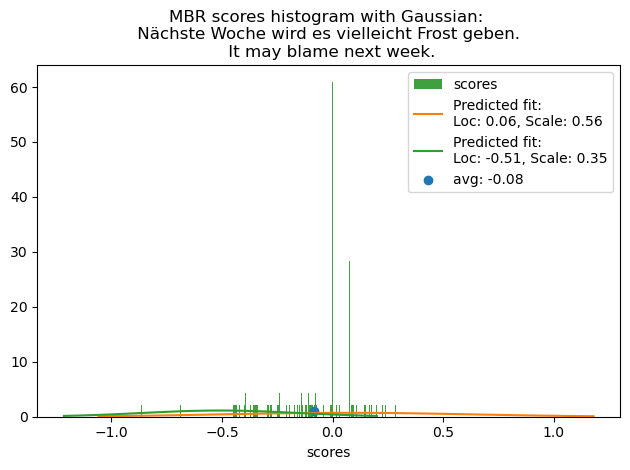

tensor([0.4968, 0.5032])


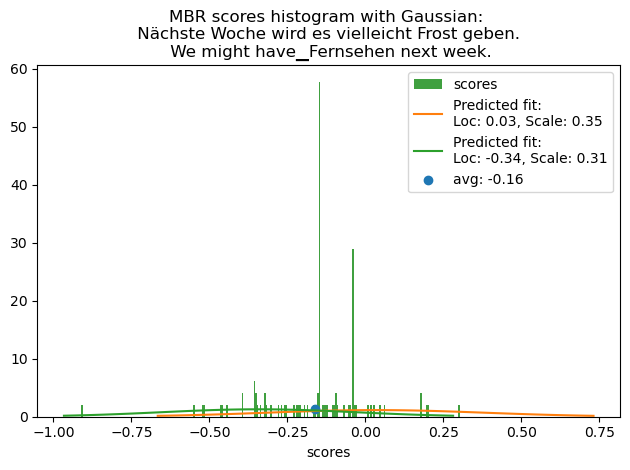

In [20]:
def compare_data_with_fit(data, fit, n_sources=5, n_hypotheses=4, seed=1):
    np.random.seed(seed)
    indices = np.random.choice(len(fit), size=n_sources)
    
    
    for i in indices:
        entry = data.iloc[i]
        repeated_utils = get_repeated_utils(entry["utilities"], entry["utilities_count"])
        hypotheses_indices = np.random.choice(len(entry["utilities"]), size=n_hypotheses)
        for hypothesis_index in hypotheses_indices:
            hypothesis = entry["hypotheses"][hypothesis_index]
            target = entry["target"]
            source = entry["source"]

            utils = repeated_utils[hypothesis_index]
            
            loc = fit[i]["loc"][hypothesis_index].tolist()
            scale = fit[i]["scale"][hypothesis_index].tolist()
            print(torch.softmax(fit[i]['logits'][hypothesis_index], dim=0))
            show_gaussian_mix(loc, scale, utils, source, target, hypothesis, save=True, path="./test_imgs/")

compare_data_with_fit(dataset.data, all_model_out, )      


In [21]:
#train dataset
dataset_loader = BayesRiskDatasetLoader("train_predictive", n_hypotheses=10, n_references=100, sampling_method='ancestral')
dataset_train = dataset_loader.load(type="pandas")

tensor([0.5956, 0.4044])


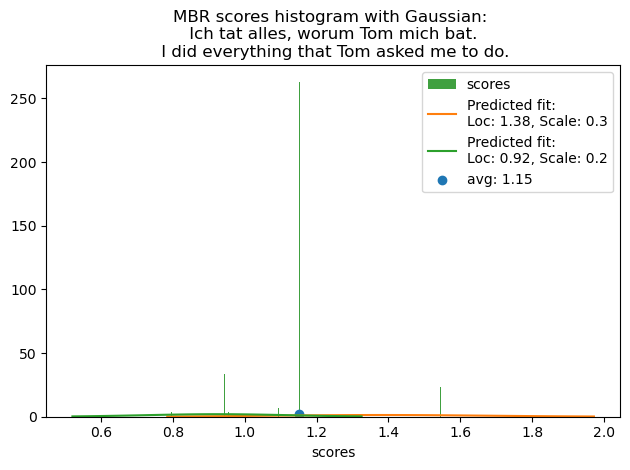

tensor([0.5835, 0.4165])


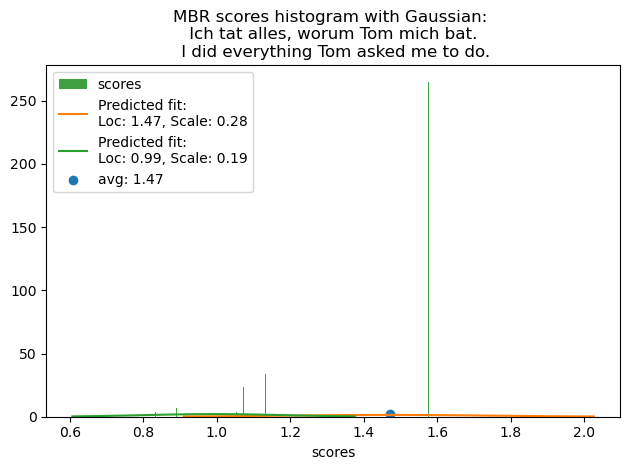

tensor([0.5835, 0.4165])


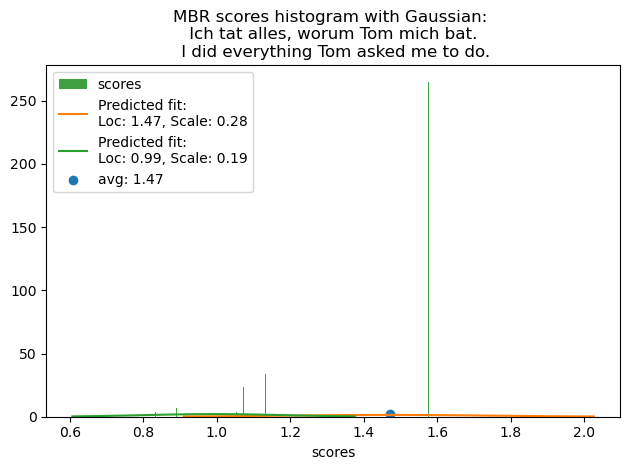

tensor([0.5956, 0.4044])


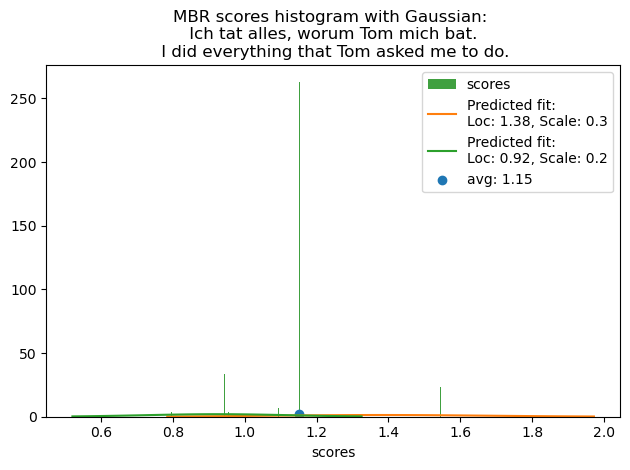

tensor([0.5164, 0.4836])


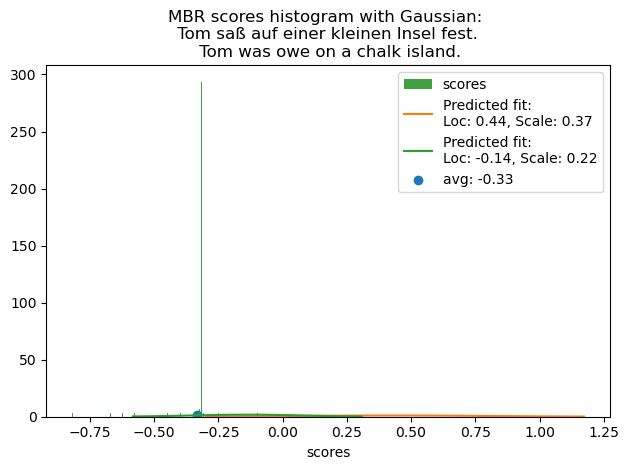

tensor([0.4961, 0.5039])


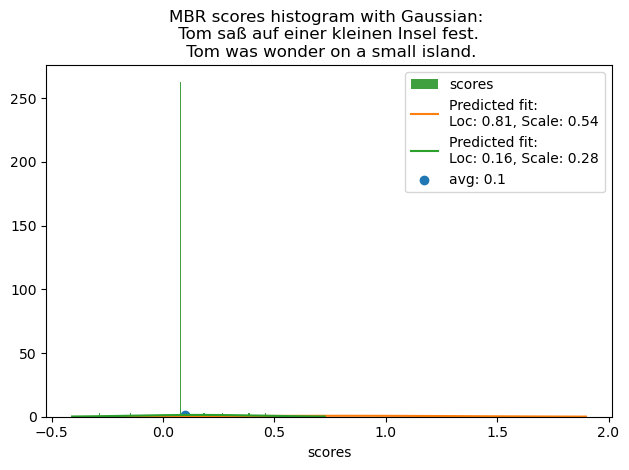

tensor([0.4881, 0.5119])


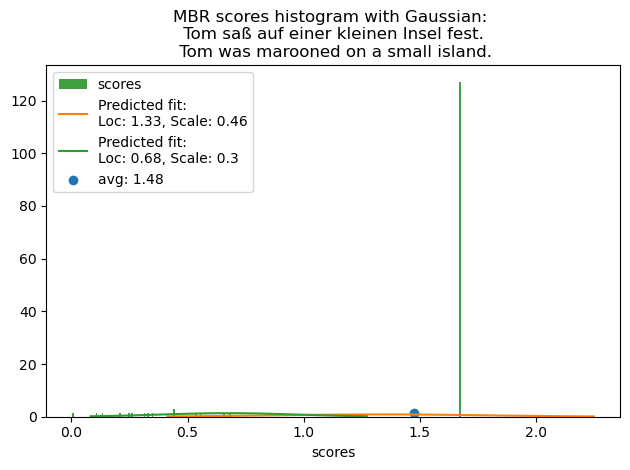

tensor([0.5164, 0.4836])


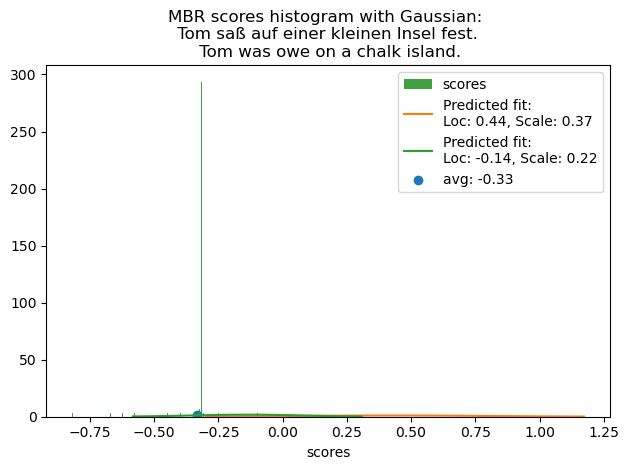

tensor([0.5337, 0.4663])


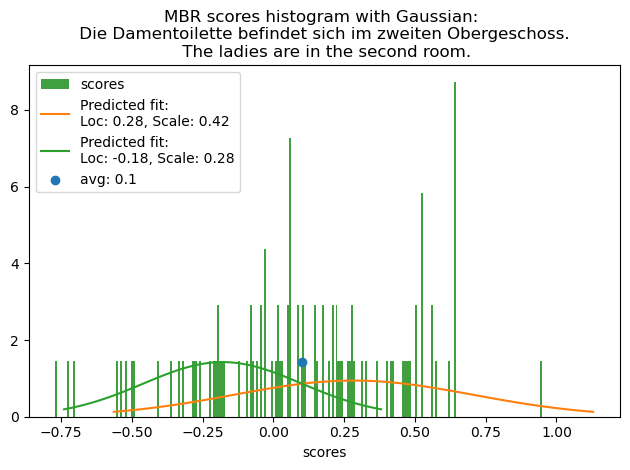

tensor([0.5486, 0.4514])


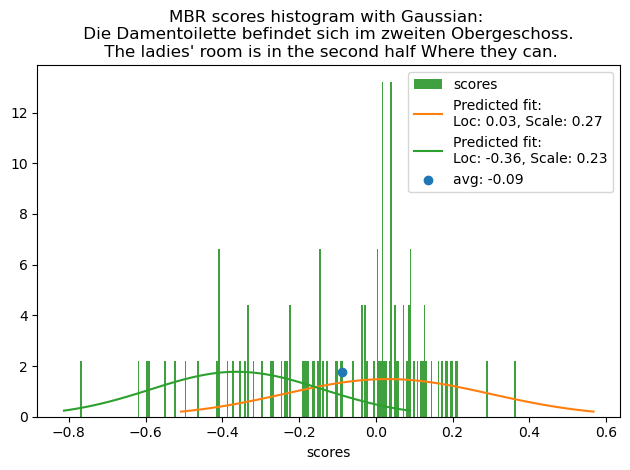

tensor([0.5417, 0.4583])


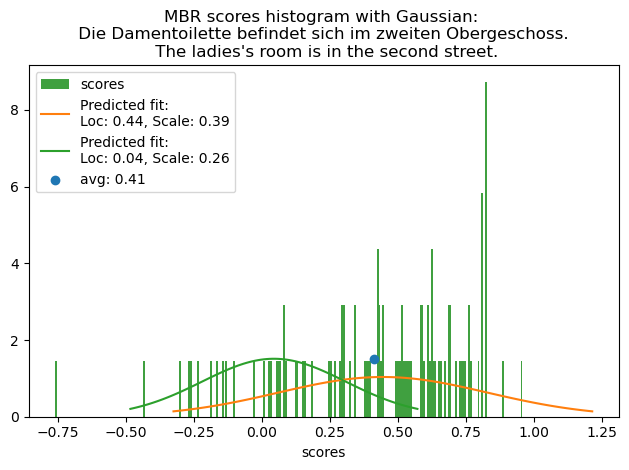

tensor([0.5410, 0.4590])


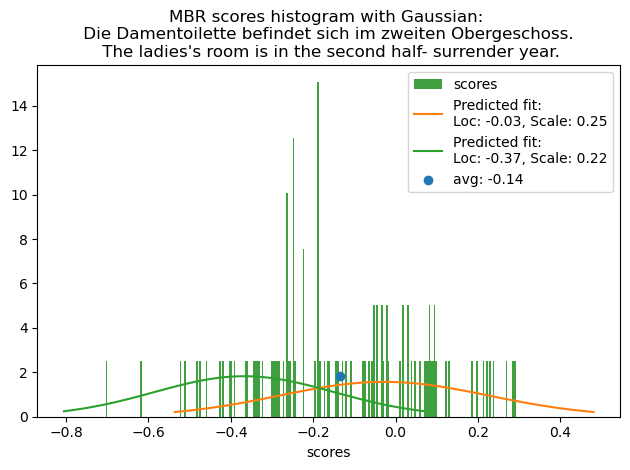

tensor([0.6025, 0.3975])


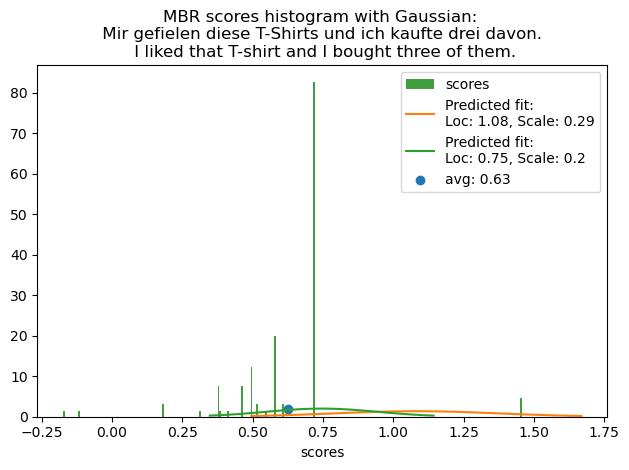

tensor([0.5947, 0.4053])


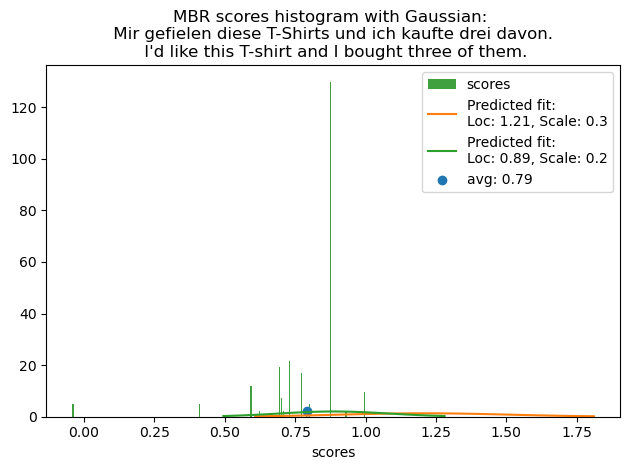

tensor([0.6025, 0.3975])


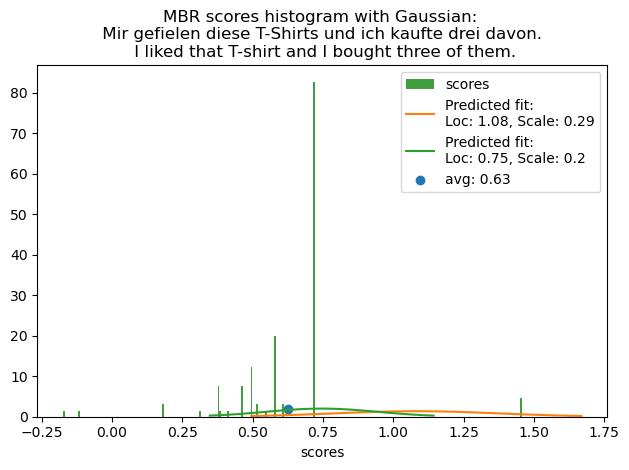

tensor([0.5999, 0.4001])


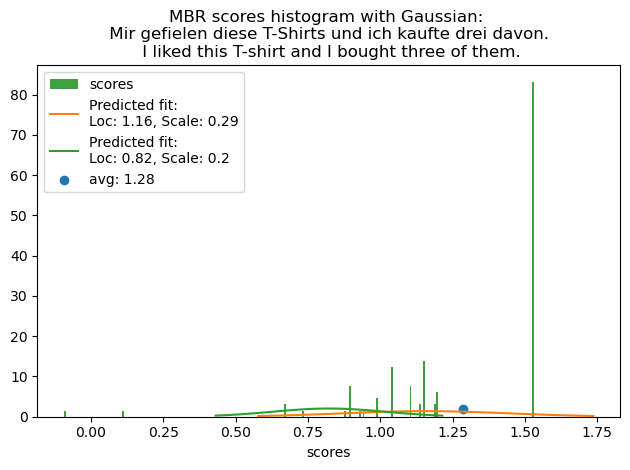

tensor([0.5274, 0.4726])


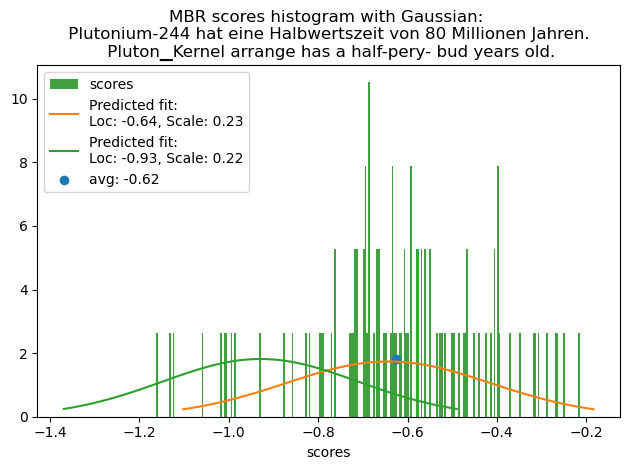

tensor([0.5283, 0.4717])


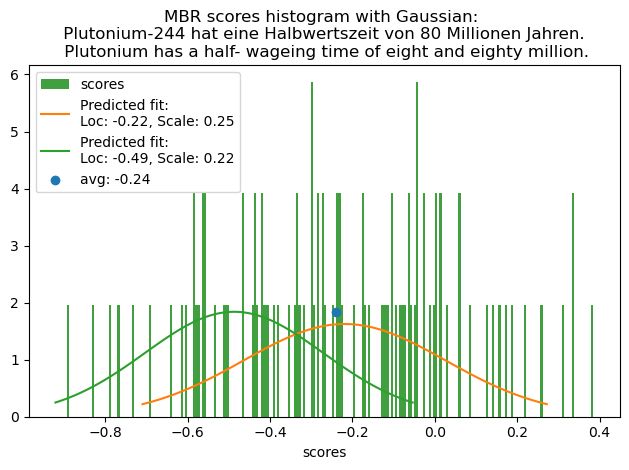

tensor([0.5423, 0.4577])


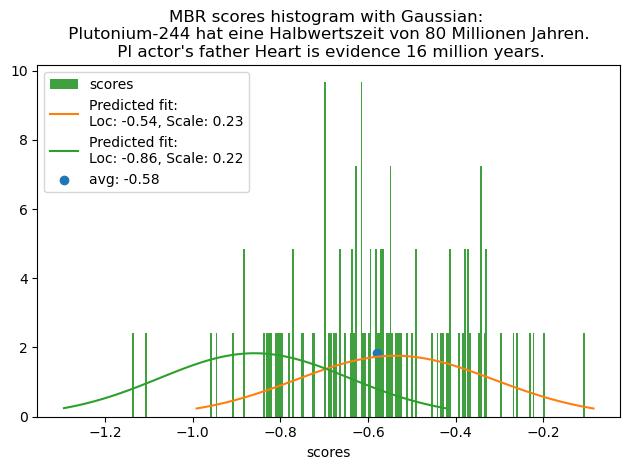

tensor([0.5423, 0.4577])


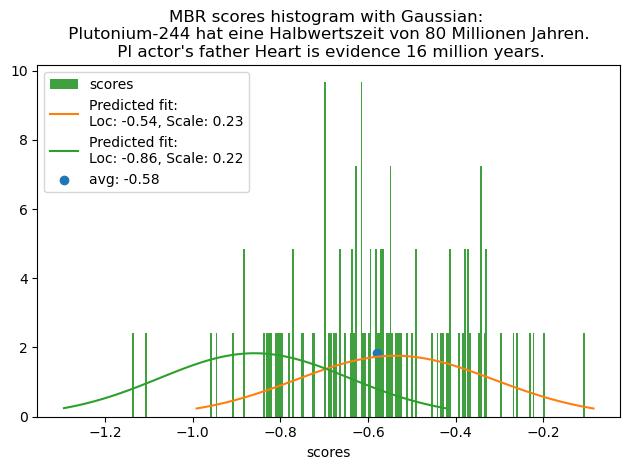

In [22]:
def compare_data_on_model(df, model, n_sources=5, n_hypotheses=4, seed=1):
    
    np.random.seed(seed)
    indices = np.random.choice(len(df["utilities"]), size=n_sources)
    
    for i in indices:
        row = df.iloc[i]
        source = row["source"]
        target = row["target"]
        hypotheses = list(row["hypotheses"])
        repeated_utils = get_repeated_utils(row["utilities"], row["utilities_count"])
        model_out = wrapped_model.get_model_out([source]* len(hypotheses), hypotheses)
        
        hypothesis_indices = np.random.choice(len(hypotheses), size=n_hypotheses)
        
        for h_i in hypothesis_indices:
            loc = model_out['loc'][h_i].tolist()
            scale = model_out['scale'][h_i].tolist()
            
            utils = repeated_utils[h_i]
            hypothesis = hypotheses[h_i]
             

            print(torch.softmax(model_out['logits'][h_i], dim=0))
            show_gaussian_mix(loc, scale, utils, source, target, hypothesis, save=True, path="./train_imgs/")

        
    


compare_data_on_model(dataset_train.data, wrapped_model)    